In [102]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
from google.colab import drive
drive.mount('Colab_Data_Files')

Drive already mounted at Colab_Data_Files; to attempt to forcibly remount, call drive.mount("Colab_Data_Files", force_remount=True).


In [104]:
df = pd.read_csv('/content/Colab_Data_Files/MyDrive/Colab Notebooks/Colab_Files_Data/34_Feature_Transformation/Missing_Indicator/train.csv',usecols=['Age','Fare','Survived'])

In [105]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [106]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [107]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [108]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [109]:
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [110]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [111]:
X_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [112]:
X_train.sample(5)

,Age,Fare,Age_imputed
390,36.0,120.0000,36.0
196,NaN,7.7500,NaN
284,NaN,26.0000,NaN
662,47.0,25.5875,47.0
332,38.0,153.4625,38.0


In [113]:
X_train['Age_imputed'][X_train['Age_imputed']==1]

827    1.0
381    1.0
788    1.0
Name: Age_imputed, dtype: float64

In [114]:
df['Age'][df['Age'].notnull()].sample()

377    27.0
Name: Age, dtype: float64

In [115]:
s=X_train['Age_imputed'][X_train['Age_imputed'].isnull()].shape[0]
s

148

In [117]:
s=X_train['Age_imputed'][X_train['Age_imputed'].isnull()].shape[0]
X_train['Age_imputed'][X_train['Age_imputed'].isnull()]=X_train['Age'][X_train['Age'].notnull()].sample(s)

In [16]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
 ## replaceing all nan values of age imputed of randomly selected values of non null values of Age column.
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [17]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([17.  , 14.  , 16.  , 29.  , 37.  , 45.5 , 40.  , 21.  , 35.  ,
       44.  , 25.  , 21.  , 44.  , 25.  , 30.  , 21.  , 32.  , 23.  ,
       16.  , 47.  , 60.  , 18.  , 62.  , 40.  , 43.  , 32.5 , 38.  ,
       30.  , 22.  , 24.  ,  9.  , 32.  , 33.  , 27.  , 50.  , 32.  ,
       39.  , 22.  , 22.  , 32.  , 53.  ,  0.83, 27.  , 16.  , 14.  ,
       23.  , 17.  , 38.  , 26.  , 23.  , 36.  , 16.  , 30.  , 37.  ,
        3.  ,  9.  , 24.  , 39.  , 38.  , 18.  , 54.  , 34.  , 20.  ,
       29.  , 21.  , 27.  , 21.  , 21.  , 58.  , 15.  , 19.  , 20.  ,
       26.  , 25.  , 70.  , 25.  , 34.  , 46.  , 37.  , 24.  , 36.  ,
       25.  , 22.  , 28.  , 24.  , 27.  , 14.  , 14.  , 30.  , 26.  ,
       25.  ,  1.  , 33.  , 35.  , 47.  , 32.  ,  0.42,  1.  , 16.  ,
       65.  , 24.  , 16.  , 52.  , 30.  , 36.5 , 29.  , 17.  , 39.  ,
       39.  , 48.  , 29.  , 16.  , 48.  , 23.  , 24.  , 41.  , 31.  ,
       61.  , 35.  , 20.  , 40.  , 31.  , 39.  , 24.  , 41.  , 30.  ,
       47.  , 28.  ,

In [18]:
X_train['Age'].isnull().sum()

148

In [19]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.00
10,4.0,16.7000,4.00
873,47.0,9.0000,47.00
182,9.0,31.3875,9.00
876,20.0,9.8458,20.00
...,...,...,...
534,30.0,8.6625,30.00
584,NaN,8.7125,26.00
493,71.0,49.5042,71.00
527,NaN,221.7792,36.00


<ipython-input-20-a4e9b458bbaf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='Original',hist=False)
<ipython-input-20-a4e9b458bbaf>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)


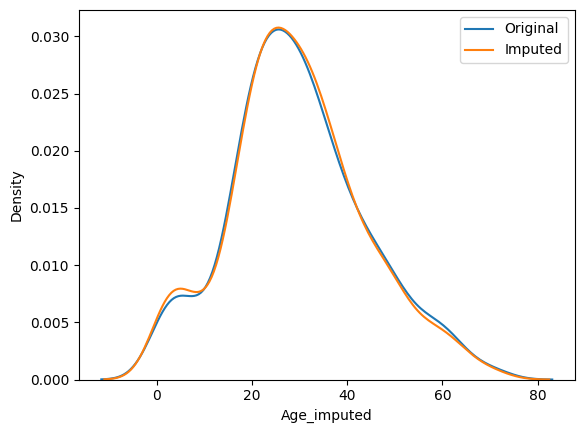

In [20]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

In [21]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.34951339046142
Variance after random imputation:  201.4915262818233


In [22]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,62.947874
Age,71.512440,204.349513,204.349513
Age_imputed,62.947874,204.349513,201.491526


<Axes: >

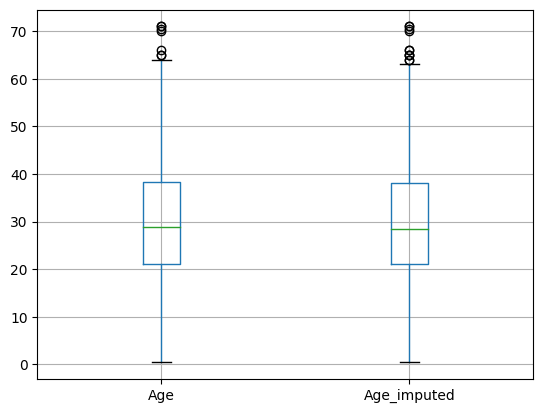

In [23]:
X_train[['Age', 'Age_imputed']].boxplot()

In [24]:
data = pd.read_csv('/content/Colab_Data_Files/MyDrive/Colab Notebooks/Colab_Files_Data/34_Feature_Transformation/house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [25]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [26]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [27]:
X = data
y = data['SalePrice']

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [29]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [30]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
1378,NaN,TA,83000,TA,NaN
1252,NaN,TA,130000,TA,NaN
993,NaN,TA,173900,TA,NaN
671,NaN,TA,103600,TA,NaN
1300,TA,TA,225000,TA,TA


In [31]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

<ipython-input-31-f5eeca8d3074>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
<ipython-input-31-f5eeca8d3074>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values
<ipython-input-31-f5eeca8d3074>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documen

In [32]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [33]:
temp

,original,imputed
TA,0.951043,0.950342
Fa,0.037171,0.038527
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [34]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.645342
TA,0.412439,0.547699
Fa,0.040917,0.053872
Po,0.027823,0.033670
Ex,0.024550,0.030303


<ipython-input-35-1d278de3936c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
<ipython-input-35-1d278de3936c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] =

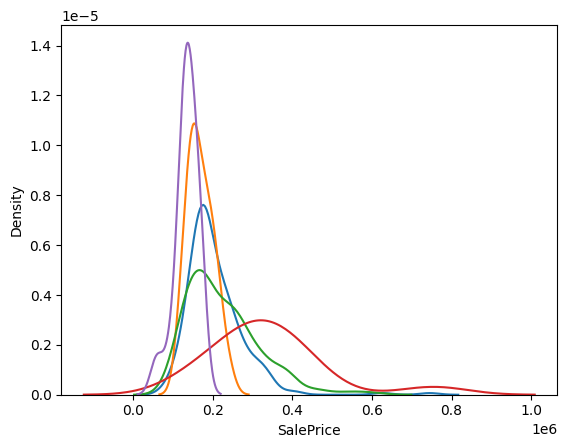

In [35]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

<ipython-input-36-e022f194d9d8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
<ipython-input-36-e022f194d9d8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['Firepla

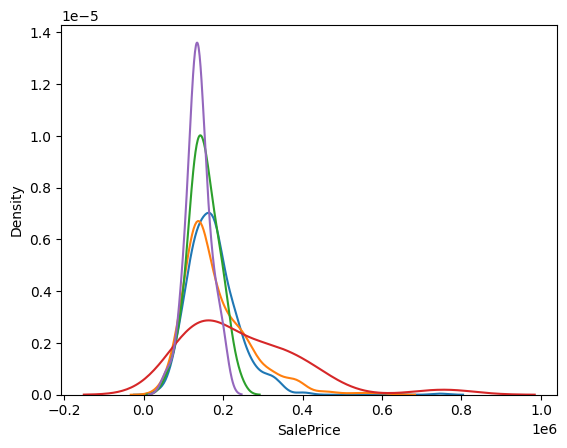

In [36]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()